# HR Analytics project

### Data description

Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.

Attrition in human resources refers to the gradual loss of employees overtime. In general, relatively high attrition is problematic for companies.

We have to use the HR Analytical data for analyzing the attrition in the dataset and make a model that predicts if an employee will attritate or not.

## Importing libraries

In [150]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

## Loading the dataset

In [151]:
df= pd.read_csv('HRanalytics.csv')
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [152]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

We can check all the columns here. Attrition is our target column.

In [153]:
print(df.nunique())

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

We can see here, certain columns having just one value. these columns play no part in model building,as well as employee no. lets drop them.

In [154]:
df.drop(['EmployeeCount','Over18','StandardHours','EmployeeNumber'], axis=1, inplace= True)
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,3,Male,...,3,3,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,4,Male,...,3,1,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,Male,...,4,2,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,4,Male,...,3,4,0,17,3,2,9,6,0,8


## EDA

In [155]:
df.shape

(1470, 31)

In the dataset we have 1470 rows and 32 columns.

In [156]:
# checking null values.

df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

We see no null values in the data set. lets visualize it.

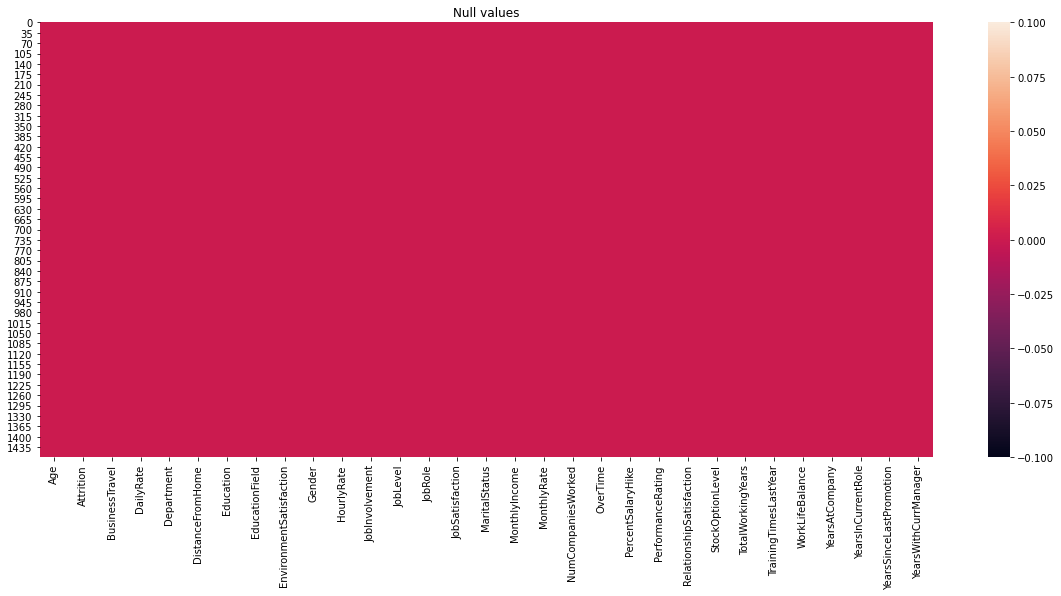

In [157]:
plt.figure(figsize=[20,8])
sns.heatmap(df.isnull())
plt.title('Null values')
plt.show()

By visualization we can also see no null values present.

In [158]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYear        int64
WorkLifeBalance              int64
YearsAtCompany               int64
YearsInCurrentRole  

In [159]:
# Lets check the unique values

for i in range(len(df.columns)):
    print(df.columns[i])
    print(df[df.columns[i]].unique())

Age
[41 49 37 33 27 32 59 30 38 36 35 29 31 34 28 22 53 24 21 42 44 46 39 43
 50 26 48 55 45 56 23 51 40 54 58 20 25 19 57 52 47 18 60]
Attrition
['Yes' 'No']
BusinessTravel
['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
DailyRate
[1102  279 1373 1392  591 1005 1324 1358  216 1299  809  153  670 1346
  103 1389  334 1123 1219  371  673 1218  419  391  699 1282 1125  691
  477  705  924 1459  125  895  813 1273  869  890  852 1141  464 1240
 1357  994  721 1360 1065  408 1211 1229  626 1434 1488 1097 1443  515
  853 1142  655 1115  427  653  989 1435 1223  836 1195 1339  664  318
 1225 1328 1082  548  132  746  776  193  397  945 1214  111  573 1153
 1400  541  432  288  669  530  632 1334  638 1093 1217 1353  120  682
  489  807  827  871  665 1040 1420  240 1280  534 1456  658  142 1127
 1031 1189 1354 1467  922  394 1312  750  441  684  249  841  147  528
  594  470  957  542  802 1355 1150 1329  959 1033 1316  364  438  689
  201 1427  857  933 1181 1395  662 1436  194  967 1496

We can see that the caterogical columns having int datatype are in encoded form. Lets encode the object type data.

### Encoding

In [160]:
from sklearn.preprocessing import LabelEncoder
enc= LabelEncoder()

In [161]:
for i in df.columns:
    if df[i].dtypes== 'object':
        df[i]= enc.fit_transform(df[i].values.reshape(-1,1))
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,2,0,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,3,1,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,1,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,4,0,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,1,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,884,1,23,2,3,3,1,...,3,3,1,17,3,3,5,2,0,3
1466,39,0,2,613,1,6,1,3,4,1,...,3,1,1,9,5,3,7,7,1,7
1467,27,0,2,155,1,4,3,1,2,1,...,4,2,1,6,0,3,6,2,0,3
1468,49,0,1,1023,2,2,3,3,4,1,...,3,4,0,17,3,2,9,6,0,8


In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   Attrition                 1470 non-null   int32
 2   BusinessTravel            1470 non-null   int32
 3   DailyRate                 1470 non-null   int64
 4   Department                1470 non-null   int32
 5   DistanceFromHome          1470 non-null   int64
 6   Education                 1470 non-null   int64
 7   EducationField            1470 non-null   int32
 8   EnvironmentSatisfaction   1470 non-null   int64
 9   Gender                    1470 non-null   int32
 10  HourlyRate                1470 non-null   int64
 11  JobInvolvement            1470 non-null   int64
 12  JobLevel                  1470 non-null   int64
 13  JobRole                   1470 non-null   int32
 14  JobSatisfaction           1470 non-null 

All object type data along with the the target column have been encoded.

In [163]:
for i in range(len(df.columns)):
    print(df.columns[i])
    print(df[df.columns[i]].unique())

Age
[41 49 37 33 27 32 59 30 38 36 35 29 31 34 28 22 53 24 21 42 44 46 39 43
 50 26 48 55 45 56 23 51 40 54 58 20 25 19 57 52 47 18 60]
Attrition
[1 0]
BusinessTravel
[2 1 0]
DailyRate
[1102  279 1373 1392  591 1005 1324 1358  216 1299  809  153  670 1346
  103 1389  334 1123 1219  371  673 1218  419  391  699 1282 1125  691
  477  705  924 1459  125  895  813 1273  869  890  852 1141  464 1240
 1357  994  721 1360 1065  408 1211 1229  626 1434 1488 1097 1443  515
  853 1142  655 1115  427  653  989 1435 1223  836 1195 1339  664  318
 1225 1328 1082  548  132  746  776  193  397  945 1214  111  573 1153
 1400  541  432  288  669  530  632 1334  638 1093 1217 1353  120  682
  489  807  827  871  665 1040 1420  240 1280  534 1456  658  142 1127
 1031 1189 1354 1467  922  394 1312  750  441  684  249  841  147  528
  594  470  957  542  802 1355 1150 1329  959 1033 1316  364  438  689
  201 1427  857  933 1181 1395  662 1436  194  967 1496 1169 1145  630
  303 1256  440 1450 1452  465  70

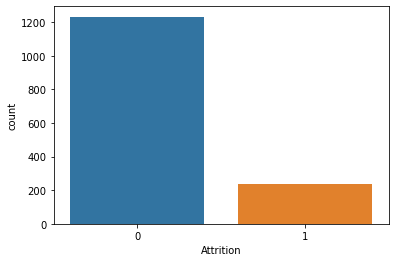

In [164]:
# checking for class imbalance

sns.countplot(df['Attrition'])

Here 0 is for No and 1 is for Yes. we can see class imbalance is present, lets treat it with upsampling.

### Making target balanced (Upsampling)

In [165]:
x1= df.drop('Attrition',axis=1)
y1= df['Attrition']

In [166]:
x_train,x_test,y_train,y_test= train_test_split(x1,y1, test_size=.25,random_state=26)

In [167]:
from sklearn.utils import resample

In [168]:
x1= pd.concat([x_train,y_train], axis=1)

In [169]:
no= x1[x1.Attrition==0]
yes= x1[x1.Attrition==1]

In [170]:
yes_up= resample(yes, replace=True, n_samples= len(no),random_state=26)

In [171]:
df1= pd.concat([no,yes_up])

In [172]:
df1.Attrition.value_counts()

1    907
0    907
Name: Attrition, dtype: int64

Our target is now balanced

In [173]:
# Adding the test data back to the dataframe so there is no data loss and to perform visualization. 

test= pd.concat([x_test,y_test], axis=1)

new= pd.concat([df1, test])

In [174]:
new.Attrition.value_counts()

0    1233
1     949
Name: Attrition, dtype: int64

Still data is balanced.

In [175]:
new.shape

(2182, 31)

## Visualization

<function matplotlib.pyplot.show(*args, **kw)>

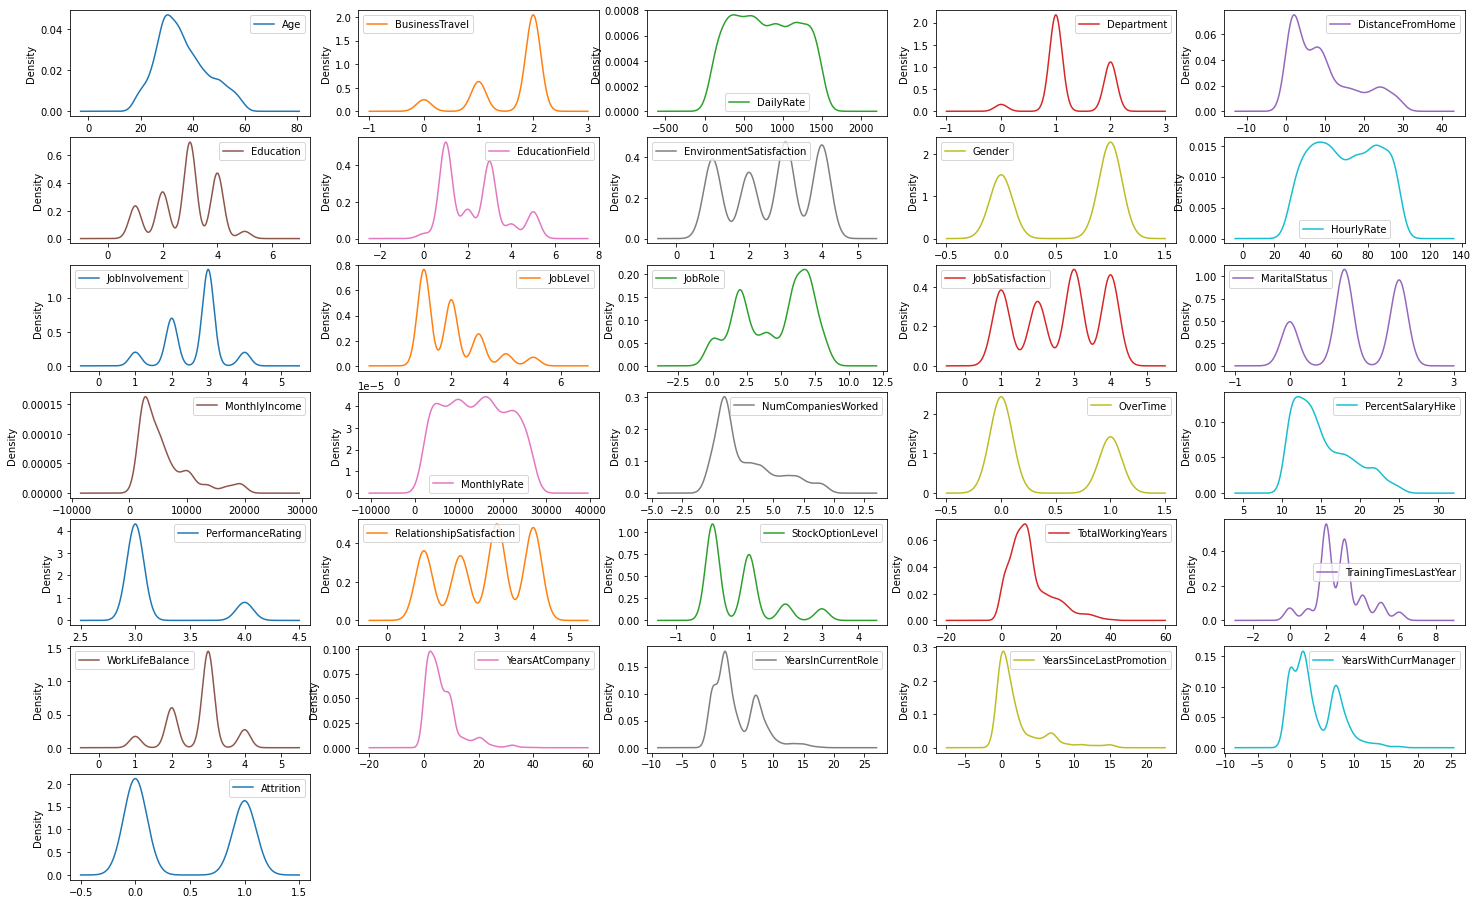

In [176]:
new.plot(kind='density', subplots= True, layout=(7,5),sharex=False, legend=True, figsize=[25,16])
plt.show

We can check the distribution of all the columns. lets check closely.

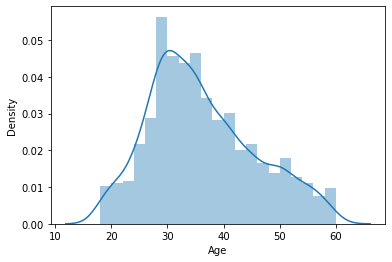

In [177]:
sns.distplot(new['Age']);

data is near to normally distributed here. close to bell shaped curve.

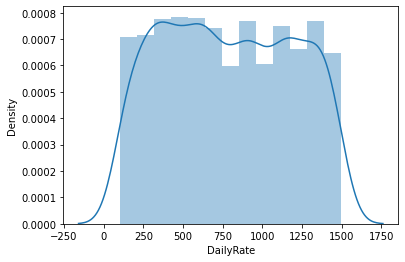

In [178]:
sns.distplot(new['DailyRate']);

In the data we can see variance. no skewness present.

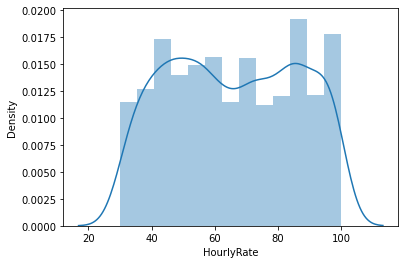

In [179]:
sns.distplot(new['HourlyRate']);

We can see certain variance in data here as well.

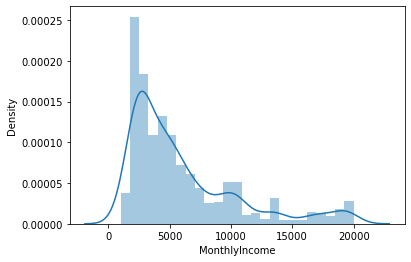

In [180]:
sns.distplot(new['MonthlyIncome']);

Here data is normally distributed at first but skewed at the end with variance, right tailed skew.

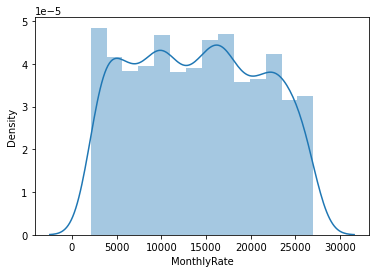

In [181]:
sns.distplot(new['MonthlyRate']);

Here we can see variance in data. no skewness.

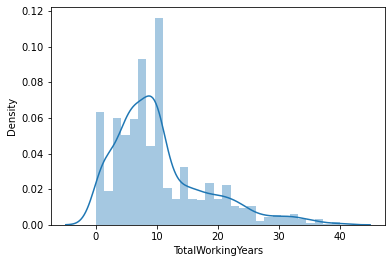

In [182]:
sns.distplot(new['TotalWorkingYears']);

Data is normally distributed at beginning and little skewed at the end.

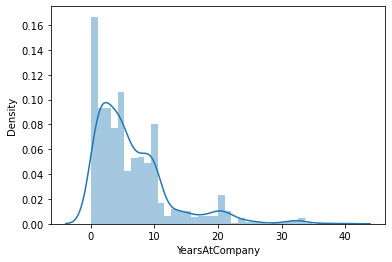

In [183]:
sns.distplot(new['YearsAtCompany']);

Here data has some variance and skewness can be seen, right skewed. 

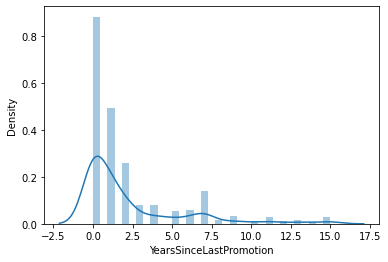

In [184]:
sns.distplot(new['YearsSinceLastPromotion']);

Data here also has variance and is right tailed skewed.

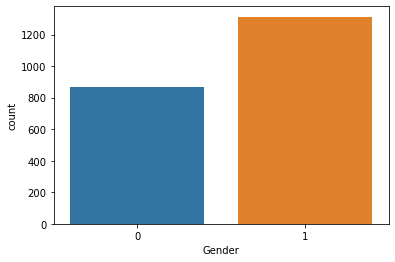

In [185]:
sns.countplot(new['Gender']);

More males are there as compared to female.

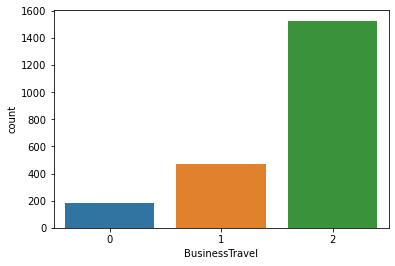

In [186]:
sns.countplot(new['BusinessTravel']);

Here rarely travellers are the most and non travellers the least.

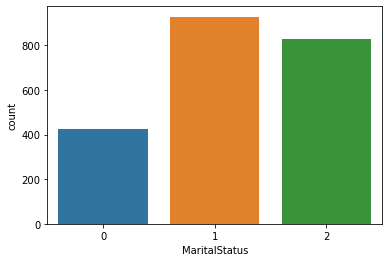

In [187]:
sns.countplot(new['MaritalStatus']);

Here married people are the most followed by single then divorced.

### Checking correlation

In [188]:
cor= new.corr()
cor

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
Age,1.000000,0.049393,0.040937,0.012733,-0.003070,0.211629,-0.057469,0.041831,0.001837,0.044293,...,0.071166,0.070851,0.672915,-0.003851,-0.034073,0.357260,0.265103,0.251237,0.257490,-0.187039
BusinessTravel,0.049393,1.000000,0.032986,-0.006899,-0.049774,0.021154,0.022143,0.019106,0.011276,-0.033330,...,0.005398,0.010753,0.048397,0.002984,-0.023483,0.016937,0.022741,-0.014622,-0.001989,0.016038
DailyRate,0.040937,0.032986,1.000000,0.006858,-0.049629,-0.031128,0.067390,0.024082,0.017718,0.049449,...,0.009411,0.005503,0.033750,-0.029361,0.014791,-0.032481,0.006978,-0.037285,-0.031225,-0.069653
Department,0.012733,-0.006899,0.006858,1.000000,-0.000158,0.012068,0.003824,0.022386,-0.062963,-0.024968,...,-0.043966,-0.038959,0.002121,0.042465,0.024400,0.018181,0.056632,0.046334,0.048754,0.068597
DistanceFromHome,-0.003070,-0.049774,-0.049629,-0.000158,1.000000,0.025941,-0.048777,-0.000515,-0.013895,0.013796,...,-0.001638,0.039852,0.004251,-0.062625,-0.049535,-0.002804,0.002016,0.039902,0.014485,0.094175
Education,0.211629,0.021154,-0.031128,0.012068,0.025941,1.000000,-0.029268,-0.019313,-0.006053,0.001029,...,0.029366,0.037011,0.172494,-0.012691,-0.023896,0.113951,0.088705,0.086950,0.108975,-0.062305
EducationField,-0.057469,0.022143,0.067390,0.003824,-0.048777,-0.029268,1.000000,0.068555,0.022824,0.003036,...,-0.011476,-0.066461,-0.017199,0.022066,0.011457,0.006587,0.029873,0.014175,0.009004,0.075511
EnvironmentSatisfaction,0.041831,0.019106,0.024082,0.022386,-0.000515,-0.019313,0.068555,1.000000,0.018515,-0.013605,...,0.013228,0.002174,0.016027,0.011993,-0.020176,0.024175,0.040239,0.060387,0.031779,-0.166347
Gender,0.001837,0.011276,0.017718,-0.062963,-0.013895,-0.006053,0.022824,0.018515,1.000000,0.020804,...,0.103235,0.012274,-0.068060,-0.009415,-0.048931,-0.078507,-0.086488,-0.052426,-0.076037,0.018785
HourlyRate,0.044293,-0.033330,0.049449,-0.024968,0.013796,0.001029,0.003036,-0.013605,0.020804,1.000000,...,0.006880,-0.024733,-0.004972,0.022623,-0.028625,-0.011704,-0.043956,-0.050088,-0.009172,-0.003794


Here we can see the correlation between all the columns, lets visualize it.

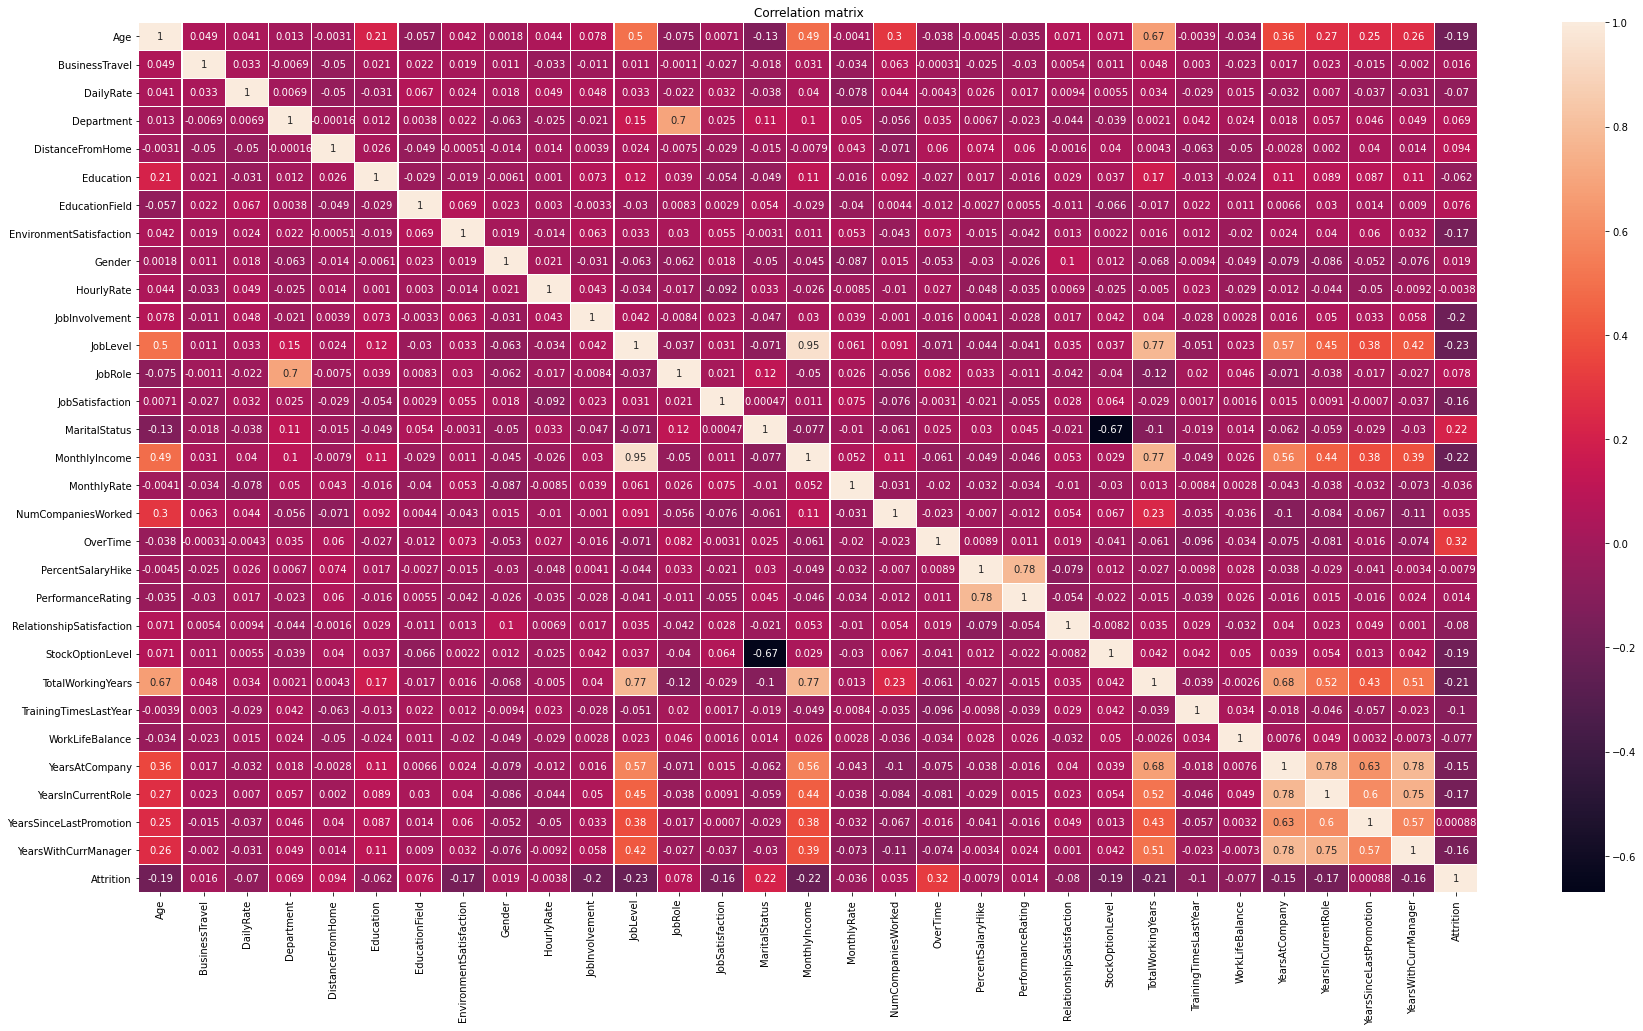

In [189]:
plt.figure(figsize=[30,16])
sns.heatmap(cor, annot=True,linewidth=0.1);
plt.title('Correlation matrix')
plt.show()

We can see only one black box, which has a very negative correlation.And some orange boxes can be seen having a good positive corelation. and mostly there is nutral correlation that can be seen.

In [190]:
# checking correlation of target with independent columns.

cor['Attrition'].sort_values(ascending=False)

Attrition                   1.000000
OverTime                    0.317826
MaritalStatus               0.216009
DistanceFromHome            0.094175
JobRole                     0.077706
EducationField              0.075511
Department                  0.068597
NumCompaniesWorked          0.035036
Gender                      0.018785
BusinessTravel              0.016038
PerformanceRating           0.013665
YearsSinceLastPromotion     0.000884
HourlyRate                 -0.003794
PercentSalaryHike          -0.007877
MonthlyRate                -0.035651
Education                  -0.062305
DailyRate                  -0.069653
WorkLifeBalance            -0.076880
RelationshipSatisfaction   -0.079856
TrainingTimesLastYear      -0.102088
YearsAtCompany             -0.148524
YearsWithCurrManager       -0.157199
JobSatisfaction            -0.163194
EnvironmentSatisfaction    -0.166347
YearsInCurrentRole         -0.173088
Age                        -0.187039
StockOptionLevel           -0.189710
J

We can check the correlation of our target with the independent columns. lets visualize it for better understanding.

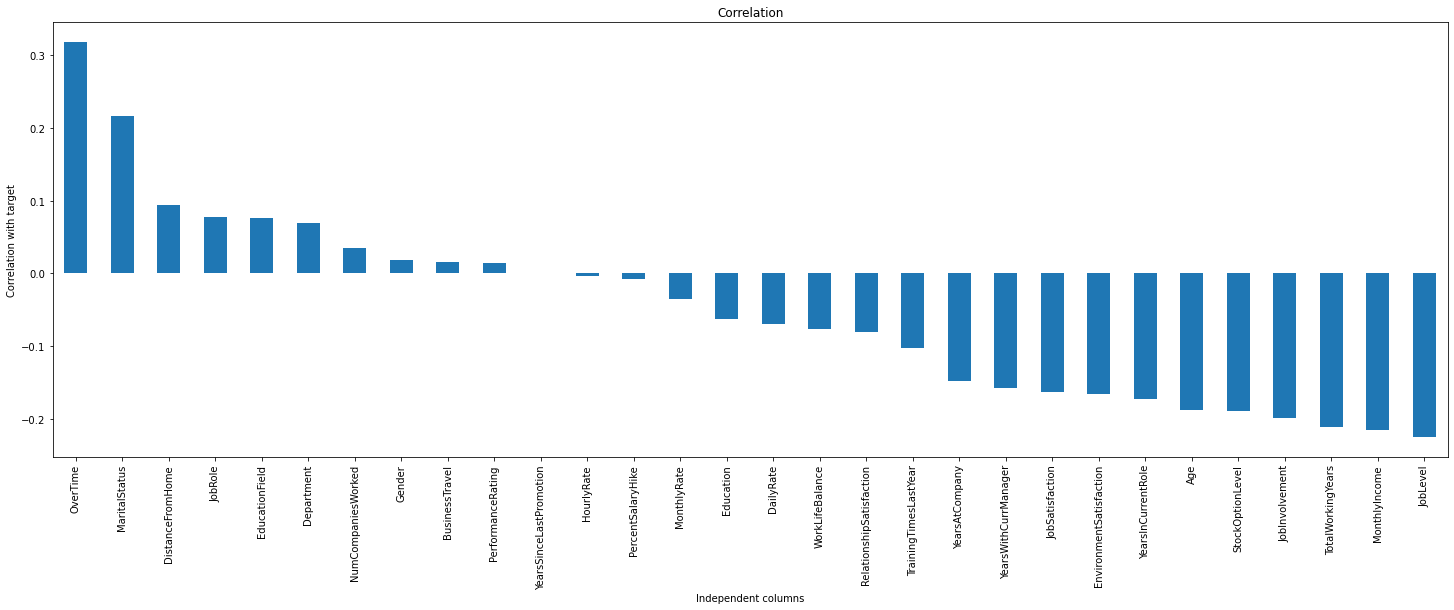

In [191]:
plt.figure(figsize=(25,8))
cor['Attrition'].sort_values(ascending=False).drop(['Attrition']).plot(kind='bar')
plt.xlabel('Independent columns')
plt.ylabel('Correlation with target')
plt.title('Correlation')
plt.show()

We can see 'Overtime' having the highest correlation among all and 'Job level' having the least correlation.'Year since last promotion' is showing near 0 correlation.

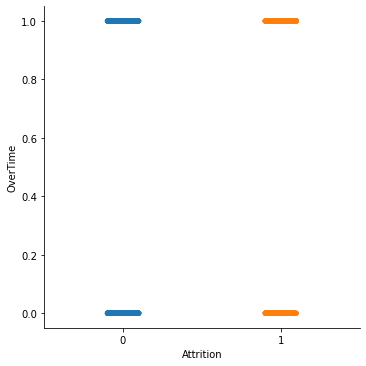

In [192]:
sns.catplot(x= 'Attrition',y='OverTime', data=new)

No correlation can be seen. but it has the highest correlation among independent columns, so we can say more the employee does over time more is the chance of attrition.

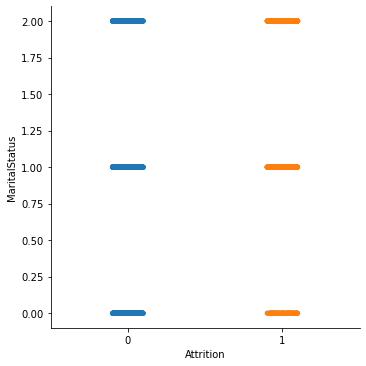

In [193]:
sns.catplot(x= 'Attrition',y='MaritalStatus', data=new)

Here too, no positive relation can be seen

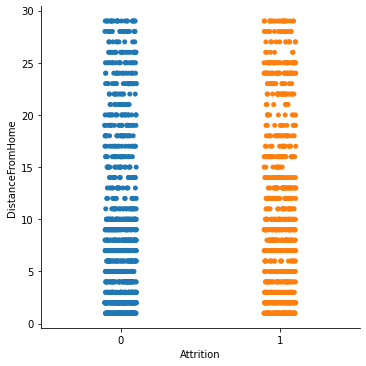

In [194]:
sns.catplot(x= 'Attrition',y='DistanceFromHome', data=new)

Not a good correlation.

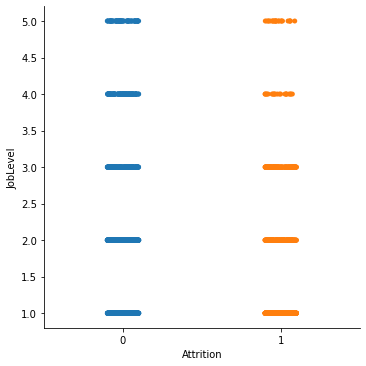

In [195]:
sns.catplot(x= 'Attrition',y='JobLevel', data=new)

A negative correlation, data points going down in the graph.

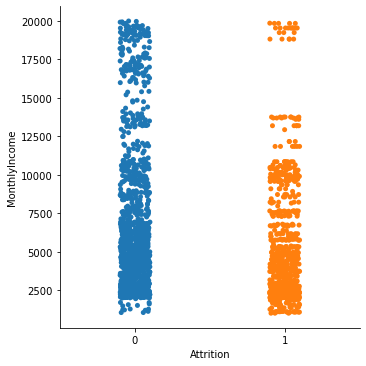

In [196]:
sns.catplot(x= 'Attrition',y='MonthlyIncome', data=new)

Negative correlation, points descreasing from top at the end.

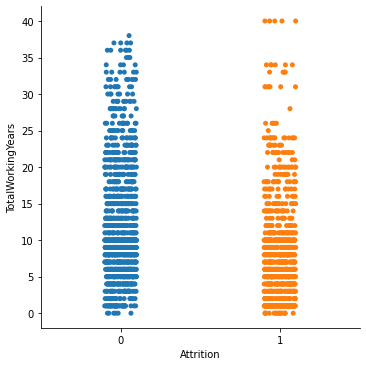

In [197]:
sns.catplot(x= 'Attrition',y='TotalWorkingYears', data=new)

A negative correlation,data points going down.

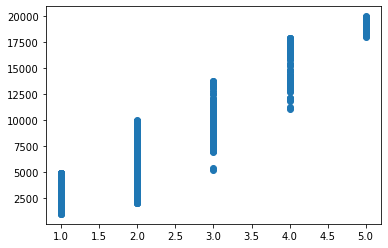

In [198]:
plt.scatter(new['JobLevel'],new['MonthlyIncome'])
plt.show()

Graph shows the most positive correlation among the independent columns. It shows as the Job level rises, monthly income also rises.

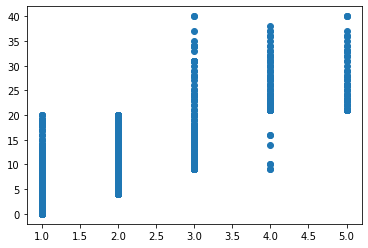

In [199]:
plt.scatter(new['JobLevel'],new['TotalWorkingYears'])
plt.show()

It also shows a positive correlation. As working years increases, job level also increases.

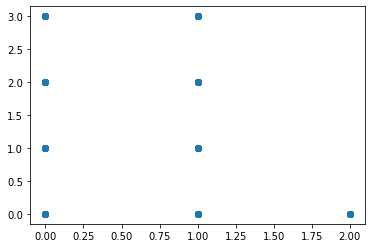

In [200]:
plt.scatter(new['MaritalStatus'],new['StockOptionLevel'])
plt.show()

The graph shows the most negative correlation among the independent columns.

### Checking skewness for the continious data column

In [201]:
new.skew()

Age                         0.487432
BusinessTravel             -1.422308
DailyRate                   0.046847
Department                  0.090156
DistanceFromHome            0.869445
Education                  -0.291044
EducationField              0.502560
EnvironmentSatisfaction    -0.180135
Gender                     -0.415948
HourlyRate                  0.005539
JobInvolvement             -0.499358
JobLevel                    1.151730
JobRole                    -0.339163
JobSatisfaction            -0.198146
MaritalStatus              -0.304729
MonthlyIncome               1.507971
MonthlyRate                 0.056577
NumCompaniesWorked          0.977152
OverTime                    0.543663
PercentSalaryHike           0.803008
PerformanceRating           1.880171
RelationshipSatisfaction   -0.239836
StockOptionLevel            1.182401
TotalWorkingYears           1.221524
TrainingTimesLastYear       0.416972
WorkLifeBalance            -0.526863
YearsAtCompany              1.890754
Y

In [202]:
# treating continious columns for skewness.

contcol=['Age','DailyRate','HourlyRate','DistanceFromHome','MonthlyIncome','MonthlyRate']

for i in new[contcol]:
    if new[i].skew()>0.5:
        new[i]= np.log(new[i].values.reshape(-1,1))
        
    if new[i].skew()<-0.5:
        new[i]= np.log(new[i].values.reshape(-1,1))
new.skew()

Age                         0.487432
BusinessTravel             -1.422308
DailyRate                   0.046847
Department                  0.090156
DistanceFromHome           -0.322500
Education                  -0.291044
EducationField              0.502560
EnvironmentSatisfaction    -0.180135
Gender                     -0.415948
HourlyRate                  0.005539
JobInvolvement             -0.499358
JobLevel                    1.151730
JobRole                    -0.339163
JobSatisfaction            -0.198146
MaritalStatus              -0.304729
MonthlyIncome               0.351068
MonthlyRate                 0.056577
NumCompaniesWorked          0.977152
OverTime                    0.543663
PercentSalaryHike           0.803008
PerformanceRating           1.880171
RelationshipSatisfaction   -0.239836
StockOptionLevel            1.182401
TotalWorkingYears           1.221524
TrainingTimesLastYear       0.416972
WorkLifeBalance            -0.526863
YearsAtCompany              1.890754
Y

Skewness has been removed for continious data.

## Finding best random state

In [203]:
# Lets split the data first into x and y first.

x=new.drop('Attrition', axis=1)
y= new['Attrition']

In [204]:
from sklearn.linear_model import LogisticRegression

maxscr=0
maxrs=0
for i in range(1,100):
    x_train,x_test,y_train,y_test= train_test_split(x,y, test_size=.25,random_state=i)
    lr= LogisticRegression()
    lr.fit(x_train,y_train)
    predlr= lr.predict(x_test)
    scr= accuracy_score(y_test,predlr)
    if scr>maxscr:
        maxscr=scr
        maxrs= i
print('Best score: ', maxscr,'on random state', maxrs)

Best score:  0.7106227106227107 on random state 12


In [226]:
# Creating train test split using best random state

x_train,x_test,y_train,y_test= train_test_split(x,y, test_size=.25,random_state=12)

## Model creation

In [227]:
lr= LogisticRegression()
lr.fit(x_train,y_train)
predlr= lr.predict(x_test)
print(accuracy_score(y_test,predlr),'\n')
print(confusion_matrix(y_test,predlr),'\n')
print(classification_report(y_test,predlr),'\n')

0.7106227106227107 

[[250  69]
 [ 89 138]] 

              precision    recall  f1-score   support

           0       0.74      0.78      0.76       319
           1       0.67      0.61      0.64       227

    accuracy                           0.71       546
   macro avg       0.70      0.70      0.70       546
weighted avg       0.71      0.71      0.71       546
 



In [228]:
from sklearn.tree import DecisionTreeClassifier

dt= DecisionTreeClassifier()
dt.fit(x_train,y_train)
preddt= dt.predict(x_test)
print(accuracy_score(y_test,preddt),'\n')
print(confusion_matrix(y_test,preddt),'\n')
print(classification_report(y_test,preddt),'\n')

0.9084249084249084 

[[276  43]
 [  7 220]] 

              precision    recall  f1-score   support

           0       0.98      0.87      0.92       319
           1       0.84      0.97      0.90       227

    accuracy                           0.91       546
   macro avg       0.91      0.92      0.91       546
weighted avg       0.92      0.91      0.91       546
 



In [229]:
from sklearn.ensemble import RandomForestClassifier

fr=RandomForestClassifier()
fr.fit(x_train,y_train)
predfr= fr.predict(x_test)
print(accuracy_score(y_test,predfr),'\n')
print(confusion_matrix(y_test,predfr),'\n')
print(classification_report(y_test,predfr),'\n')

0.9615384615384616 

[[306  13]
 [  8 219]] 

              precision    recall  f1-score   support

           0       0.97      0.96      0.97       319
           1       0.94      0.96      0.95       227

    accuracy                           0.96       546
   macro avg       0.96      0.96      0.96       546
weighted avg       0.96      0.96      0.96       546
 



In [230]:
from sklearn.svm import SVC

svc= SVC()
svc.fit(x_train,y_train)
preds= svc.predict(x_test)
print(accuracy_score(y_test,preds),'\n')
print(confusion_matrix(y_test,preds),'\n')
print(classification_report(y_test,preds),'\n')

0.5842490842490843 

[[319   0]
 [227   0]] 

              precision    recall  f1-score   support

           0       0.58      1.00      0.74       319
           1       0.00      0.00      0.00       227

    accuracy                           0.58       546
   macro avg       0.29      0.50      0.37       546
weighted avg       0.34      0.58      0.43       546
 



In [231]:
from sklearn.ensemble import AdaBoostClassifier

ad= AdaBoostClassifier()
ad.fit(x_train,y_train)
predad= ad.predict(x_test)
print(accuracy_score(y_test,predad),'\n') 
print(confusion_matrix(y_test,predad),'\n')
print(classification_report(y_test,predad))

0.815018315018315 

[[265  54]
 [ 47 180]] 

              precision    recall  f1-score   support

           0       0.85      0.83      0.84       319
           1       0.77      0.79      0.78       227

    accuracy                           0.82       546
   macro avg       0.81      0.81      0.81       546
weighted avg       0.82      0.82      0.82       546



Here randon forest and decision tree are giving us the best f1 score. Lets check cv score for over and under fitting.

## Cross validation

In [211]:
from sklearn.model_selection import cross_val_score

scr= cross_val_score(lr,x,y,scoring="f1",cv=5)
print('cross validation score for logistic reg model: ', scr.mean())

cross validation score for logistic reg model:  0.6011366860437807


In [212]:
scr= cross_val_score(dt,x,y,scoring="f1",cv=5)
print('cross validation score for decision tree model: ', scr.mean())

cross validation score for decision tree model:  0.8937149911450313


In [213]:
scr= cross_val_score(fr,x,y,scoring="f1",cv=5)
print('cross validation score for random forest model: ', scr.mean())

cross validation score for random forest model:  0.9480022121746983


In [214]:
scr= cross_val_score(svc,x,y,scoring="f1",cv=5)
print('cross validation score for support vector classifier model: ', scr.mean())

cross validation score for support vector classifier model:  0.0


In [215]:
scr= cross_val_score(ad,x,y,scoring="f1",cv=5)
print('cross validation score for Adaboost reg model: ', scr.mean())

cross validation score for Adaboost reg model:  0.7842915852540973


Here we can see decision tree and random forest are giving us the best score, and the difference between the f1 score and cv score is nearly same in both models. Lets hyperparameter tune both and find the best model.

## Hyper parameter tuning

In [216]:
from sklearn.model_selection import GridSearchCV

par1={'criterion' : ["gini", "entropy"], 'splitter' : ["best", "random"], 'max_depth': np.arange(1,9)}

gcvdt= GridSearchCV(dt,par1,cv=5)
gcvdt.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8]),
                         'splitter': ['best', 'random']})

In [217]:
gcvdt.best_params_

{'criterion': 'entropy', 'max_depth': 8, 'splitter': 'best'}

In [232]:
# Now using the above parameter which is found to be best, we create our model.

dt_mod= DecisionTreeClassifier(criterion= 'entropy', splitter= 'best', max_depth=8, random_state=12)
dt_mod.fit(x_train,y_train)
predf1=dt_mod.predict(x_test)

print(accuracy_score(y_test,predf1))
print(confusion_matrix(y_test,predf1),'\n')
print(classification_report(y_test,predf1),'\n')

0.8388278388278388
[[261  58]
 [ 30 197]] 

              precision    recall  f1-score   support

           0       0.90      0.82      0.86       319
           1       0.77      0.87      0.82       227

    accuracy                           0.84       546
   macro avg       0.83      0.84      0.84       546
weighted avg       0.85      0.84      0.84       546
 



With decision tree, we are getting an f1 score of 86% and 82% for 0 and 1, and accuracy score of 83%.

In [219]:
# Random forest model

par2={'max_depth':np.arange(1,10), 'criterion':['gini','entropy'], 'max_features' : ["auto", "sqrt", "log2"]}

gcvfr= GridSearchCV(fr,par2,cv=5)
gcvfr.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'max_features': ['auto', 'sqrt', 'log2']})

In [233]:
gcvfr.best_params_

{'criterion': 'gini', 'max_depth': 9, 'max_features': 'sqrt'}

In [234]:
# Now we create our model, using the best parameters.

fr_mod= RandomForestClassifier(criterion= 'gini', max_depth= 9, max_features='sqrt', random_state=12)
fr_mod.fit(x_train,y_train)
predf2=fr_mod.predict(x_test)
print(accuracy_score(y_test,predf2))
print(confusion_matrix(y_test,predf2),'\n')
print(classification_report(y_test,predf2),'\n')

0.9505494505494505
[[301  18]
 [  9 218]] 

              precision    recall  f1-score   support

           0       0.97      0.94      0.96       319
           1       0.92      0.96      0.94       227

    accuracy                           0.95       546
   macro avg       0.95      0.95      0.95       546
weighted avg       0.95      0.95      0.95       546
 



With Random forest, we are getting f1 score of 96% and 94% for 0 and 1, and accuracy score of 95%

### AUC ROC Curve

In [222]:
from sklearn.metrics import plot_roc_curve

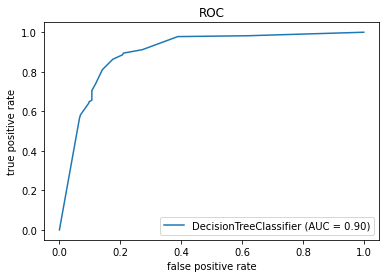

In [235]:
plot_roc_curve(dt_mod,x_test,y_test)
plt.title('ROC')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.show()

Here we can see, with decision tree, the area under the curve is found to be 90%

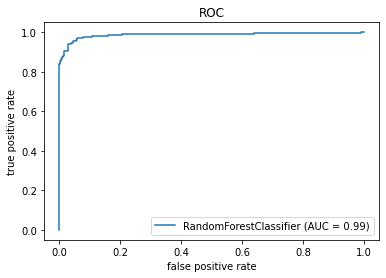

In [236]:
plot_roc_curve(fr_mod,x_test,y_test)
plt.title('ROC')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.show()

With Random forest classifier, the area under the curve is 99%

Analysing both the model we have found that Random forest is giving us a higher f1 score as well as a higher AUC value, So we make Random forest classifier our final model.

## Saving the model

In [225]:
import joblib

joblib.dump(fr_mod,'HR_Analytics.pkl')

['HR_Analytics.pkl']